### Access libraries that will be used

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

### Load file into data frame and inspect for adequacy

In [65]:
pd.set_option('display.max_rows', None)
magic=pd.read_csv(r'p:\\stats.csv')
magic.head()

,FirstName,LastName,ID,Age,Pos,Date,Tm,H/A,Opp,W/L,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
0,Nikola,Vucevic,vucevni01,30-104,C,2/5/2021,ORL,NaN,CHI,W,...,3,16,19,4,0,1,1,2,43,14.2
1,Nikola,Vucevic,vucevni01,30-084,C,1/16/2021,ORL,@,BRK,L,...,4,6,10,7,5,0,4,4,34,18.5
2,Nikola,Vucevic,vucevni01,30-066,C,12/29/2020,ORL,@,OKC,W,...,3,7,10,5,1,0,1,0,28,13.7
3,Nikola,Vucevic,vucevni01,30-077,C,1/9/2021,ORL,@,DAL,L,...,3,12,15,2,2,0,0,3,30,14.5
4,Nikola,Vucevic,vucevni01,30-070,C,1/2/2021,ORL,NaN,OKC,L,...,2,11,13,2,0,0,1,1,30,13.0


In [66]:
magic.tail()

,FirstName,LastName,ID,Age,Pos,Date,Tm,H/A,Opp,W/L,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
258,Gary,Clark,clarkga01,26-053,F,1/8/2021,ORL,@,HOU,L,...,0,4,4,0,0,1,2,1,0,-15.8
259,Gary,Clark,clarkga01,26-063,F,1/18/2021,ORL,@,NYK,L,...,0,2,2,0,0,1,0,1,0,-15.3
260,Aaron,Gordon,gordoaa01,25-133,F,1/27/2021,ORL,NaN,SAC,L,...,1,4,5,5,0,0,4,4,3,-19.5
261,Dwayne,Bacon,bacondw01,25-141,G,1/18/2021,ORL,@,NYK,L,...,0,1,1,1,0,0,1,5,2,-18.3
262,Dwayne,Bacon,bacondw01,25-147,G,1/24/2021,ORL,NaN,CHO,L,...,0,3,3,2,0,0,3,4,2,NaN


### Display data using histogram, swarmplot, and boxplot

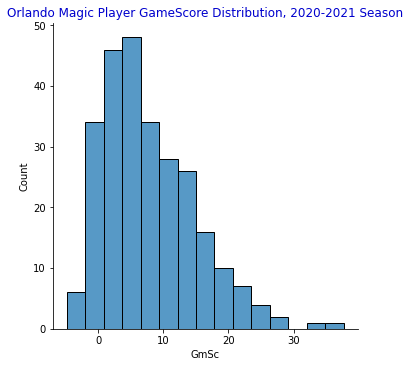

In [67]:
sns.displot(magic['GmSc'])
plt.title("Orlando Magic Player GameScore Distribution, 2020-2021 Season", color='mediumblue')
plt.show()

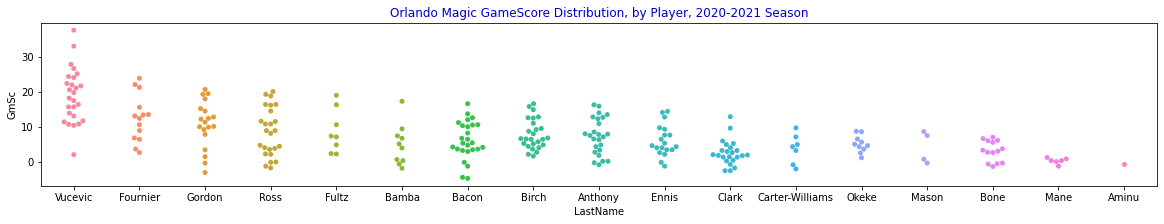

In [68]:
fig, ax = plt.subplots(figsize=(20,3))
sns.swarmplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Player, 2020-2021 Season", color='mediumblue')
plt.show()

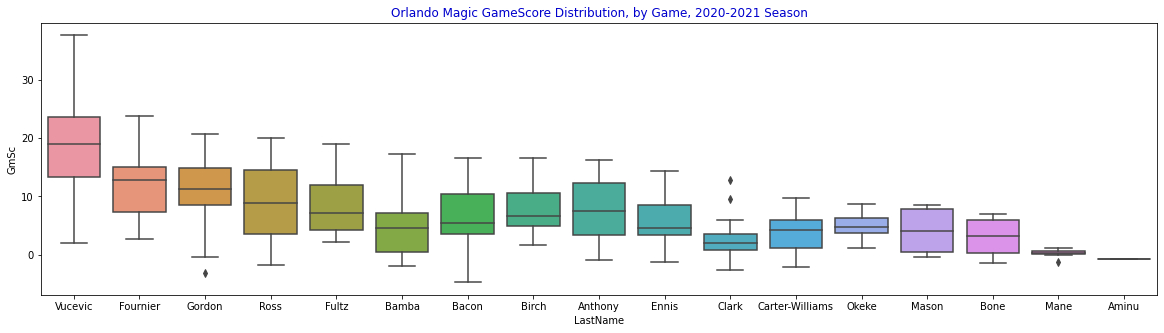

In [69]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Game, 2020-2021 Season", color='mediumblue')
plt.show()

GameScore versus Minutes Played, by Player


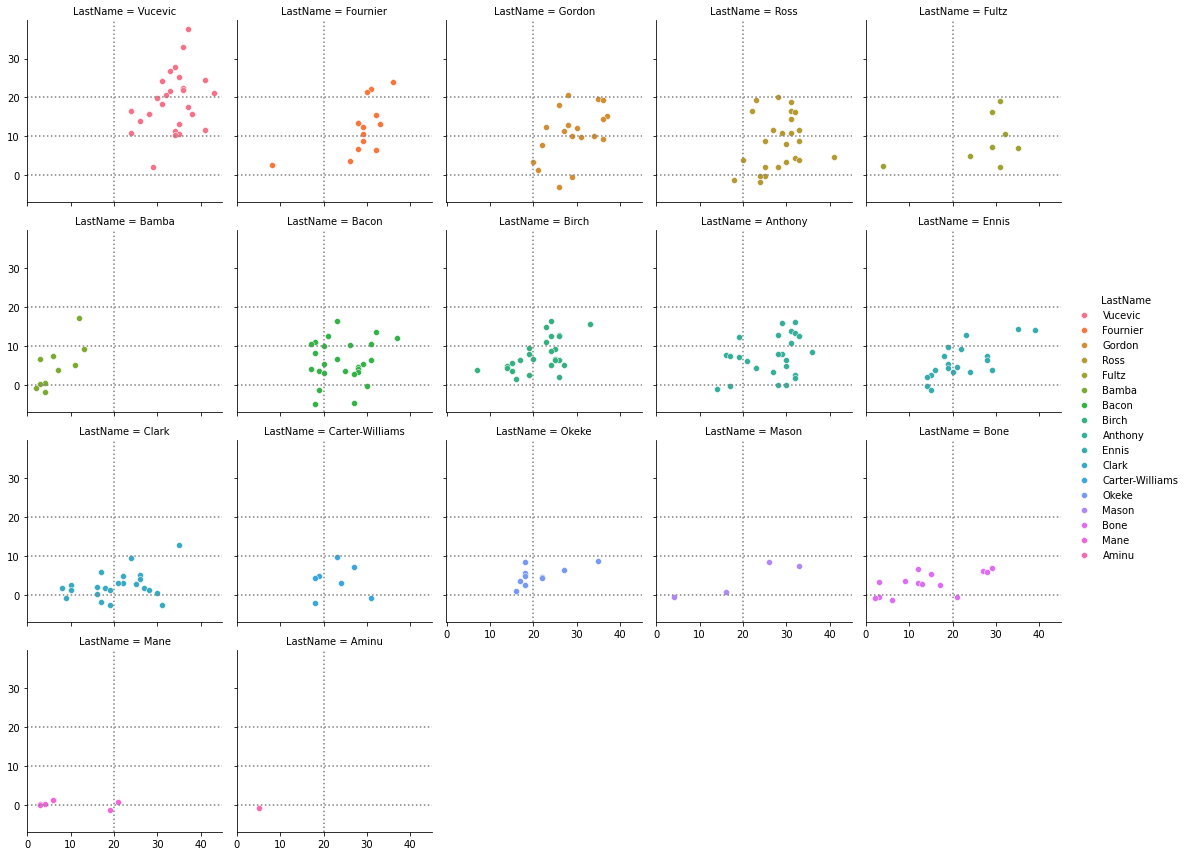

In [70]:
grid = sns.FacetGrid(magic, col = 'LastName', hue = 'LastName', col_wrap=5)
grid.map(sns.scatterplot, 'MP', 'GmSc')
grid.map(plt.axhline, y=10, ls=":", c=".5")
grid.map(plt.axhline, y=20, ls=":", c=".5")
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.axvline, x=20, ls=":", c=".5")
grid.add_legend()
print ("\033[1m"+(colored("GameScore versus Minutes Played, by Player", 'blue'))+"\033[0m")
plt.show() 
# Minutes played on x-axis, GameScore on y-axis

c:\software\wpy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


GameScore versus Date Game Played, by GmSc Rank


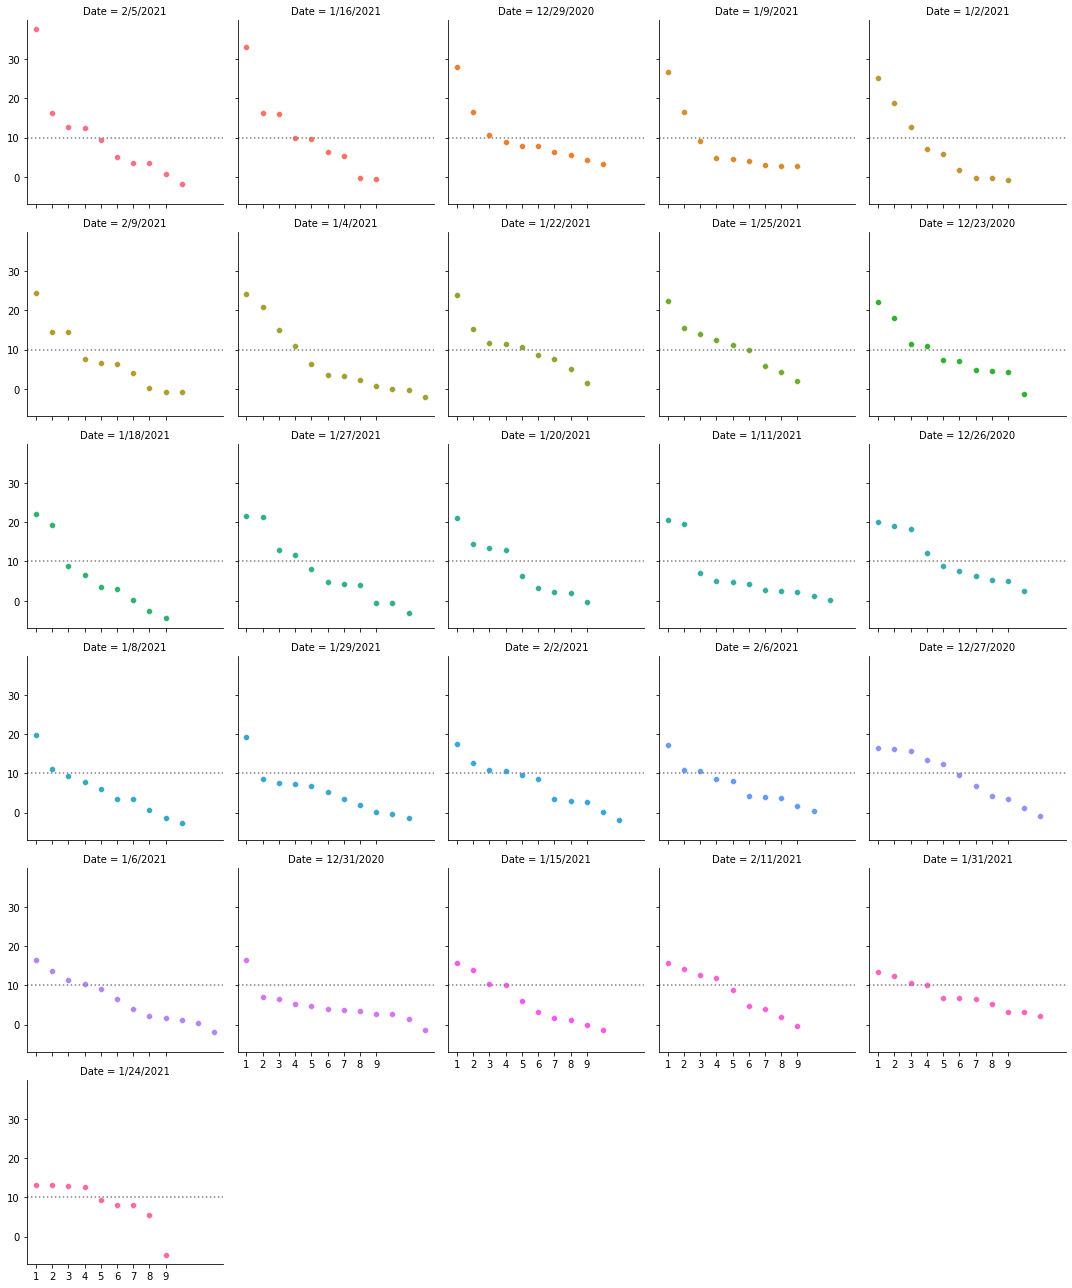

In [71]:
grid = sns.FacetGrid(magic, col = 'Date', hue = 'Date', col_wrap=5)
grid.map(sns.scatterplot, 'LastName', 'GmSc')
grid.set(xlabel="Player", ylabel="GameScore")
grid.set(xticklabels=[1,2,3,4,5,6,7,8,9,10,11])
grid.map(plt.axhline, y=10, ls=":", c=".5")
print ("\033[1m"+(colored("GameScore versus Date Game Played, by GmSc Rank", 'blue'))+"\033[0m")
plt.show() 
# x-axis shows highest GmSc on left, lowest on right for each game. Games ordered by highest game score (in the #1 position on x-axis)
# GmSc of >= 10 are considered above average performace. Points above the dashed line are 'above average'performances.

### Calculate each player's average gamescore, standard dev., and quartiles

In [72]:
print ("\033[1m"+(colored("Descriptive Statistics for GameScore, by Player", 'blue'))+"\033[0m")
magic[['LastName','GmSc']].\
groupby(['LastName'], as_index=True).describe()

Descriptive Statistics for GameScore, by Player


GmSc                                                       
                count       mean       std  min     25%    50%     75%   max
LastName                                                                    
Aminu             1.0  -0.800000       NaN -0.8  -0.800  -0.80  -0.800  -0.8
Anthony          25.0   7.356000  5.208893 -0.9   3.300   7.50  12.300  16.3
Bacon            26.0   6.092308  5.378321 -4.8   3.450   5.35  10.450  16.6
Bamba            10.0   4.810000  5.789924 -1.9   0.375   4.50   7.225  17.3
Birch            26.0   7.826923  4.261414  1.6   4.875   6.55  10.625  16.6
Bone             14.0   3.100000  2.936246 -1.4   0.350   3.15   5.875   7.0
Carter-Williams   7.0   3.742857  4.171274 -2.1   1.150   4.30   6.000   9.7
Clark            23.0   2.547826  3.589488 -2.6   0.850   1.90   3.600  12.9
Ennis            19.0   6.005263  4.457388 -1.3   3.400   4.60   8.450  14.4
Fournier         14.0  12.442857  6.649432  2.6   7.325  12.75  15.075  23.9
Fultz             8.0   8.700000  6.215189  2.2   4.175   7.20  12.025  19.0
Gordon           19.0  10.747368  6.728164 -3.1   8.500  11.30  14.850  20.7
Mane              6.0   0.216667  0.856543 -1.3   0.075   0.30   0.675   1.2
Mason             4.0   4.100000  4.605070 -0.4   0.425   4.10   7.775   8.6
Okeke            10.0   5.050000  2.433676  1.1   3.775   4.80   6.275   8.7
Ross             25.0   8.544000  6.886102 -1.8   3.500   8.90  14.500  20.1
Vucevic          26.0  19.007692  7.793481  2.0  13.300  19.00  23.675  37.7

In [73]:
print ("\033[1m"+(colored("Total Season GameScore, by Player", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName','MP']].groupby(['LastName']).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Total Season GameScore, by Player
                  GmSc   MP
LastName                   
Vucevic          494.2  873
Ross             213.6  706
Gordon           204.2  554
Birch            203.5  556
Anthony          183.9  664
Fournier         174.2  399
Bacon            158.4  632
Ennis            114.1  418
Fultz             69.6  215
Clark             58.6  476
Okeke             50.5  211
Bamba             48.1   65
Bone              43.4  197
Carter-Williams   26.2  160
Mason             16.4   79
Mane               1.3   56
Aminu             -0.8    5


In [74]:
print ("\033[1m"+(colored("Total Minutes Played, by Player", 'blue'))+"\033[0m")
game_score = magic[['MP','LastName','GmSc']].groupby(['LastName']).sum()
sort_game_score = game_score.sort_values(by=['MP'], ascending=False)
print(sort_game_score)

Total Minutes Played, by Player
                  MP   GmSc
LastName                   
Vucevic          873  494.2
Ross             706  213.6
Anthony          664  183.9
Bacon            632  158.4
Birch            556  203.5
Gordon           554  204.2
Clark            476   58.6
Ennis            418  114.1
Fournier         399  174.2
Fultz            215   69.6
Okeke            211   50.5
Bone             197   43.4
Carter-Williams  160   26.2
Mason             79   16.4
Bamba             65   48.1
Mane              56    1.3
Aminu              5   -0.8


In [75]:
print ("\033[1m"+(colored("Aggregate Team GameScore, by Game", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName','Date']].groupby(['Date']).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Aggregate Team GameScore, by Game
             GmSc
Date             
12/26/2020  105.0
2/5/2021     99.7
12/29/2020   99.2
12/27/2020   98.6
1/25/2021    98.1
1/16/2021    95.7
1/22/2021    95.5
12/23/2020   89.1
1/27/2021    84.2
1/4/2021     83.9
1/31/2021    80.5
1/24/2021    77.9
2/2/2021     77.5
2/9/2021     76.2
1/6/2021     75.4
1/20/2021    75.2
1/9/2021     74.3
2/11/2021    73.3
1/11/2021    70.3
1/2/2021     69.9
2/6/2021     69.3
1/15/2021    61.1
1/29/2021    58.8
1/8/2021     57.8
12/31/2020   56.7
1/18/2021    56.2


In [76]:
magic.describe()

,GmSc,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
count,263.000000,263.000000,263.000000,263.000000,263.000000,253.000000,263.000000,263.000000,238.000000,263.000000,...,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,253.000000
mean,7.830418,0.494297,23.825095,3.836502,8.965779,0.414387,2.726236,5.787072,0.475008,1.110266,...,1.152091,3.490494,4.642586,2.205323,0.692015,0.399240,1.285171,1.722433,10.353612,-2.237154
std,7.048701,0.500921,8.890331,3.125840,6.076702,0.213461,2.434084,4.470461,0.272590,1.304429,...,1.461877,2.865780,3.591977,2.135588,0.912285,0.718033,1.358620,1.363003,8.004797,10.149062
min,-4.800000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.700000
25%,2.700000,0.000000,18.000000,1.000000,4.000000,0.286000,1.000000,2.000000,0.310000,0.000000,...,0.000000,1.500000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,-7.600000
50%,6.500000,0.000000,25.000000,3.000000,8.000000,0.412000,2.000000,5.000000,0.500000,1.000000,...,1.000000,3.000000,4.000000,2.000000,0.000000,0.000000,1.000000,2.000000,8.000000,-2.800000
75%,12.250000,1.000000,30.500000,6.000000,13.000000,0.533000,4.000000,8.500000,0.667000,2.000000,...,2.000000,4.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,15.000000,2.900000
max,37.700000,1.000000,43.000000,17.000000,29.000000,1.000000,13.000000,20.000000,1.000000,6.000000,...,10.000000,16.000000,19.000000,10.000000,5.000000,4.000000,6.000000,6.000000,43.000000,60.300000
